In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time

In [3]:
# loading datasets
df=pd.read_csv(r'C:\Users\yvdha\datascience\linear regression\RF_data\IRIS_DATA.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


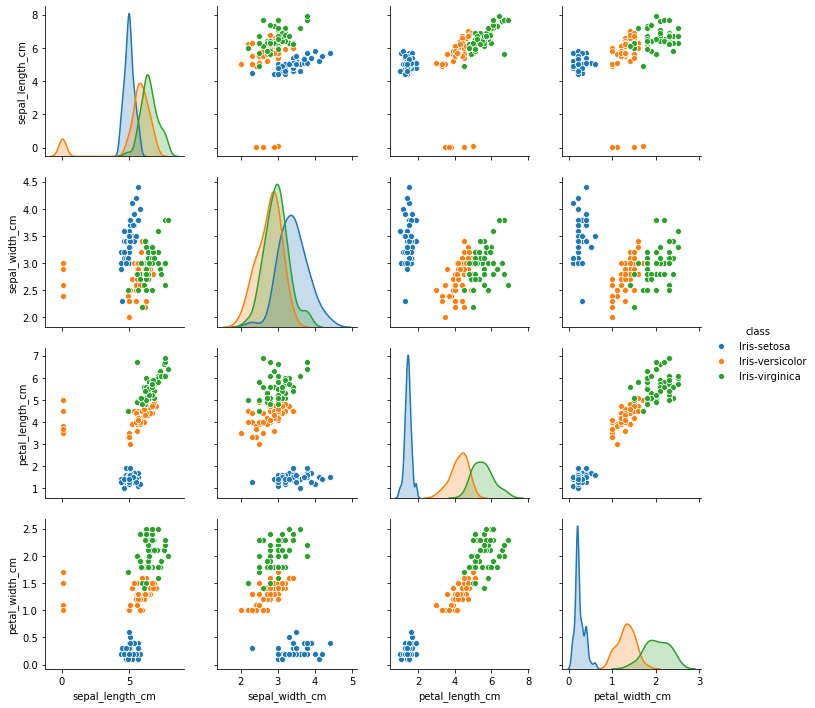

In [23]:
# pair plot of the dataset
sns.pairplot(df,hue='class');

In [13]:
# rearraning the misspalced values
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['class'].replace('Iris-setossa','Iris-setosa',inplace=True)

In [12]:
df['class'].replace('versicolor','Iris-versicolor',inplace=True)

In [27]:
# droping the outlayers
df1=df.drop(df[(df['sepal_width_cm']<2.5) & (df['petal_width_cm']<0.5)].index,axis=0)

In [42]:
df1['sepal_length_cm'][(df1['class']=='Iris-versicolor') & (df1['sepal_length_cm']<1)]*=100

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


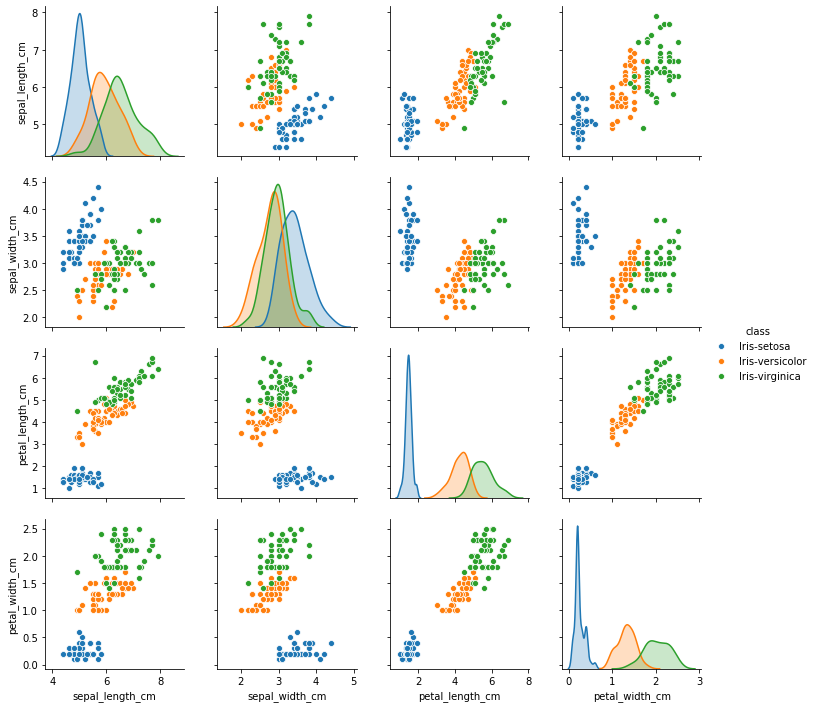

In [43]:
# pairplot after droping the outlayers
sns.pairplot(df1,hue='class')

In [48]:
# checking for nan values
df1[df1['petal_width_cm'].isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [46]:
df1.petal_width_cm.fillna(df1.groupby('class')['petal_width_cm'].transform('mean'),inplace=True)

In [51]:
df1.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [52]:
# seperating dependent and independent variables
ind_vars=['sepal_length_cm','sepal_width_cm','petal_length_cm',  'petal_width_cm']
x=df1[ind_vars]
y=df1['class']

In [201]:
# dividing dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [123]:
# importing the model
from sklearn.ensemble import RandomForestClassifier

In [146]:
model1=RandomForestClassifier()

In [190]:
model1.fit(x_train,y_trian)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
# predicting on the model
pred=model1.predict(x_test)

In [192]:
# checking the accuracy of the model
from sklearn.metrics import accuracy_score

In [193]:
accuracy_score(y_test,pred)

0.8947368421052632

Text(0.5, 0, 'Relative Importance')

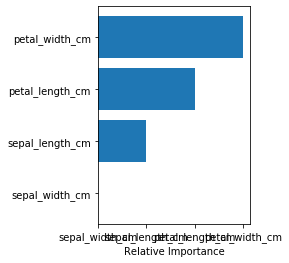

In [194]:
# feauter selection process for the randomforest on IRIS dataset
feature_importance=model1.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+ .5
plt.subplot(1,2,2)
plt.barh(pos,df1.columns[sorted_idx],align='center')
plt.yticks(pos,df1.columns[sorted_idx])
plt.xlabel('Relative Importance')

In [195]:
# applying gridsearchcv to find best paramters
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [208]:
rf_clf=RandomForestClassifier()
parameter_grid={'n_estimators':[5,10,25,50,100],
                'criterion':['gini','entropy'],
                'max_features':[1,2,3,4]}
cross_validation=StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
grid_search=GridSearchCV(rf_clf,
                         param_grid=parameter_grid,
                        cv=cross_validation)

In [209]:
start=time.time()
grid_search.fit(x_train.values,y_trian.values)
end=time.time()
print(end-start)

23.968412160873413


In [210]:
# best paramters for the model
print(grid_search.best_params_)

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 10}


In [211]:
# accuracy of the best fitted model
print(accuracy_score(y_test,grid_search.predict(x_test)))

0.9210526315789473


In [213]:
# confusion matrix for the model
from sklearn import metrics
print(metrics.confusion_matrix(y_test,grid_search.predict(x_test)))

[[11  0  0]
 [ 0 14  2]
 [ 0  1 10]]
